In [96]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


#티스토리 업로드시 최적화 코드
#from IPython.core.display import display, HTML
#display(HTML("<style>.container {width:90% !important;}</style>"))

# 2023.04.17
# EDA
Dataset Info.

train.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사
    Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)


test.csv [파일]

    ID : 샘플 고유 ID
    User-ID : 유저 고유 ID
    Book-ID : 도서 고유 ID
    유저 정보
    Age : 나이
    Location : 지역
    도서 정보
    Book-Title : 도서 명
    Book-Author : 도서 저자
    Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    Publisher : 출판사


sample_submission.csv [제출양식]

    ID : 샘플 고유 ID
    Book-Rating : 예측한 유저가 도서에 부여할 평점

In [97]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
file_dir = '/content/drive/MyDrive/데이콘/데이콘 도서 추천 알고리즘'

In [99]:
import numpy as np
import random
import os
import gc

In [100]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [101]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [102]:
csv_to_parquet(file_dir + '/train.csv', 'train')
csv_to_parquet(file_dir + '/test.csv', 'test')

train Done.
test Done.


In [103]:
train = pd.read_parquet('/content/train.parquet')
test = pd.read_parquet('/content/test.parquet')
sample_submission = pd.read_csv(file_dir+'/sample_submission.csv', index_col = 0)

In [104]:
train.head(10)

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books
7,TRAIN_000007,USER_00000,BOOK_269070,0,23.0,"sackville, new brunswick, canada",Forests of the Heart (Newford),Charles de Lint,2001.0,Tor Books
8,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press
9,TRAIN_000009,USER_00001,BOOK_210079,0,35.0,"wake forest, north carolina, usa",The Self Matters Companion : Helping You Creat...,Phillip C. McGraw,2002.0,Free Press


                     결손값 개수  결손값_ratio
ID                        0        0.0
User-ID                   0        0.0
Book-ID                   0        0.0
Book-Rating               0        0.0
Age                       0        0.0
Location                  0        0.0
Book-Title                0        0.0
Book-Author               0        0.0
Year-Of-Publication       0        0.0
Publisher                 0        0.0
                     결손값 개수  결손값_ratio
ID                        0        0.0
User-ID                   0        0.0
Book-ID                   0        0.0
Age                       0        0.0
Location                  0        0.0
Book-Title                0        0.0
Book-Author               0        0.0
Year-Of-Publication       0        0.0
Publisher                 0        0.0


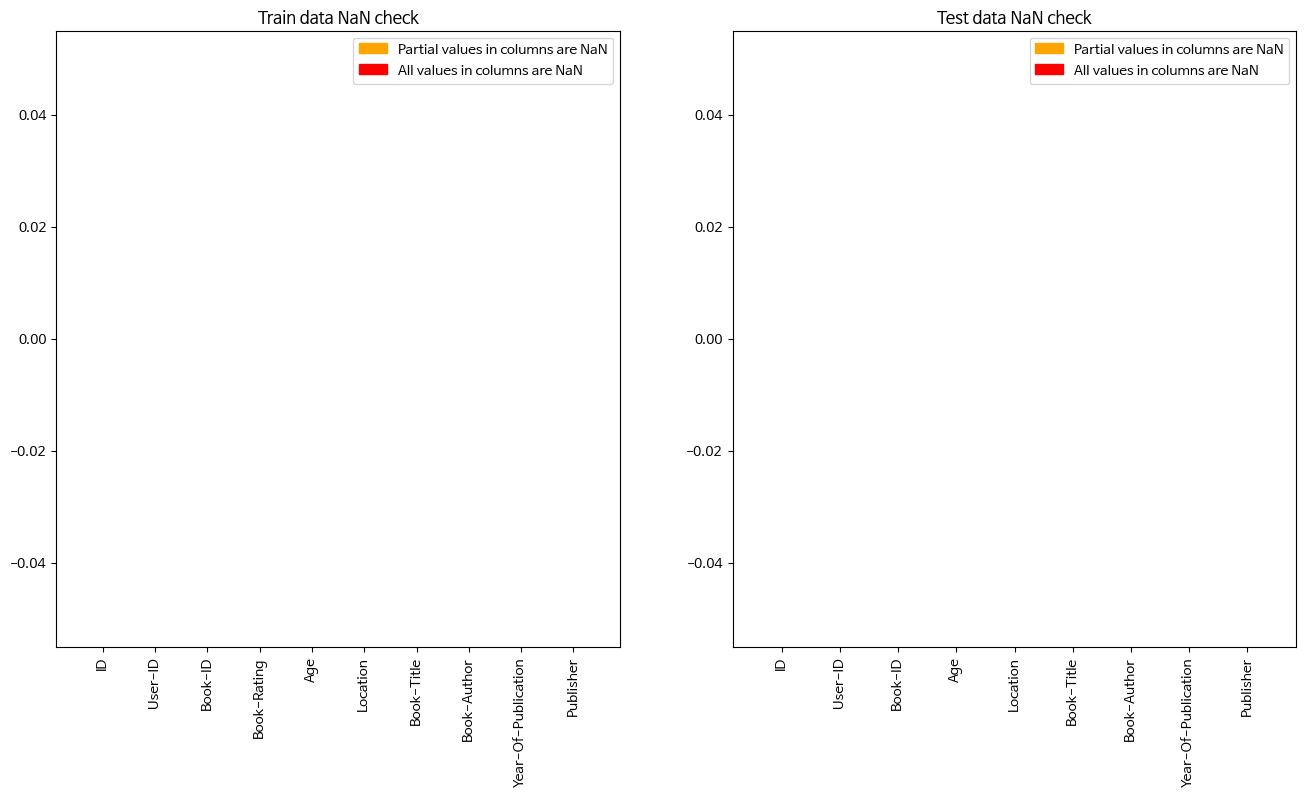

In [105]:
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

column = ['결손값 개수']
axis_1 = pd.DataFrame(data = train.isnull().sum(axis=1), columns = column)
axis_1 = axis_1.sort_values(by = '결손값 개수', ascending = False)

train.isnull().sum(axis=0)
train_row_NaN = pd.DataFrame(train.isnull().sum(axis=0), columns = column)
train_row_NaN = train_row_NaN.sort_values(by = '결손값 개수', ascending = False)
train_row_su = train.shape[0]
train_row_NaN['결손값_ratio'] = train_row_NaN['결손값 개수']/train_row_su

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (16,8))
x = np.arange(len(train_row_NaN.index))
plt.subplot(1, 2, 1)
plt.xticks(x, train_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])

def color(data):
    if data == 1:
        return 'red'
    else:
        return 'orange'
plt.bar(x, train_row_NaN['결손값_ratio'], color = [color(i) for i in train_row_NaN['결손값_ratio']])
plt.title('Train data NaN check')

test.isnull().sum(axis=0)
test_row_NaN = pd.DataFrame(test.isnull().sum(axis=0), columns = column)
test_row_NaN = test_row_NaN.sort_values(by = '결손값 개수', ascending = False)
test_row_su = test.shape[0]
test_row_NaN['결손값_ratio'] = test_row_NaN['결손값 개수']/test_row_su

plt.subplot(1, 2, 2)
x2 = np.arange(len(test_row_NaN.index))
plt.xticks(x2, test_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])
plt.bar(x2, test_row_NaN['결손값_ratio'], color = [color(i) for i in test_row_NaN['결손값_ratio']])
plt.title('Test data NaN check')

print(train_row_NaN)
print(test_row_NaN)
plt.show()

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [107]:
train['Book-Title'] = train['Book-Title'].astype('str')
train['Book-Author'] = train['Book-Author'].astype('str')

title_corpus = ' '.join(train['Book-Title'])
Author_corpus = ' '.join(train['Book-Author'])

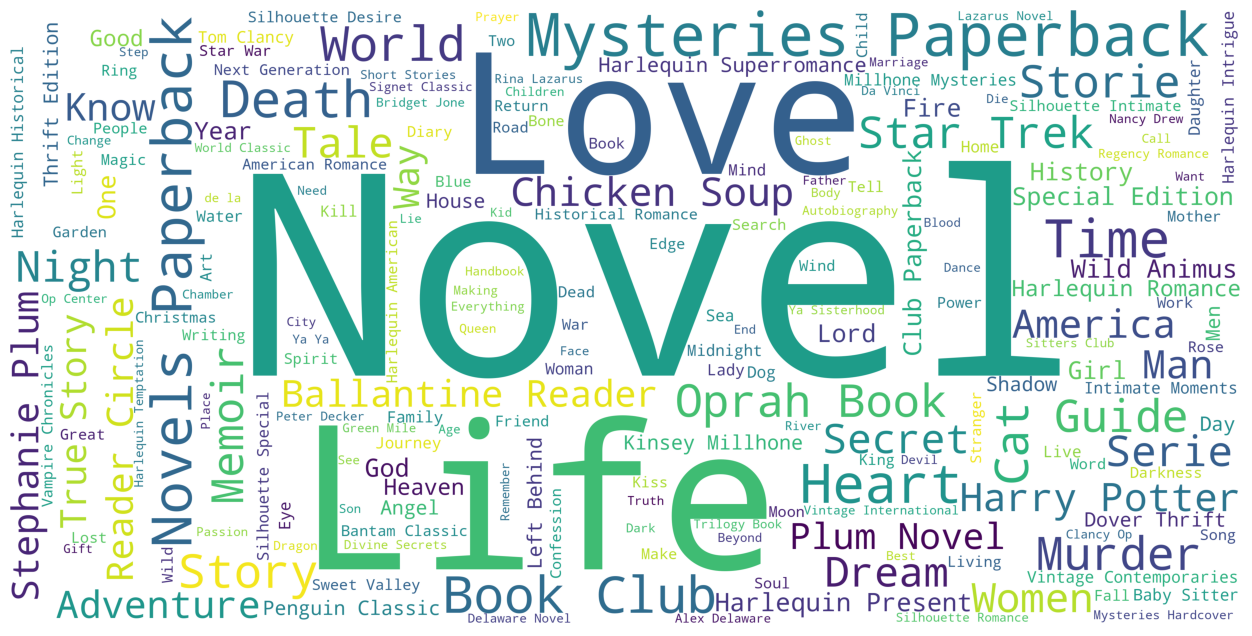

In [108]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

책제목에 많이 사용되는 키워드는 Novel, LOVE, LIFE 등이 있으며 Mysteries와 같은 장르나 paperback(soft cover) 제본양식 등이 자주 등장한다.

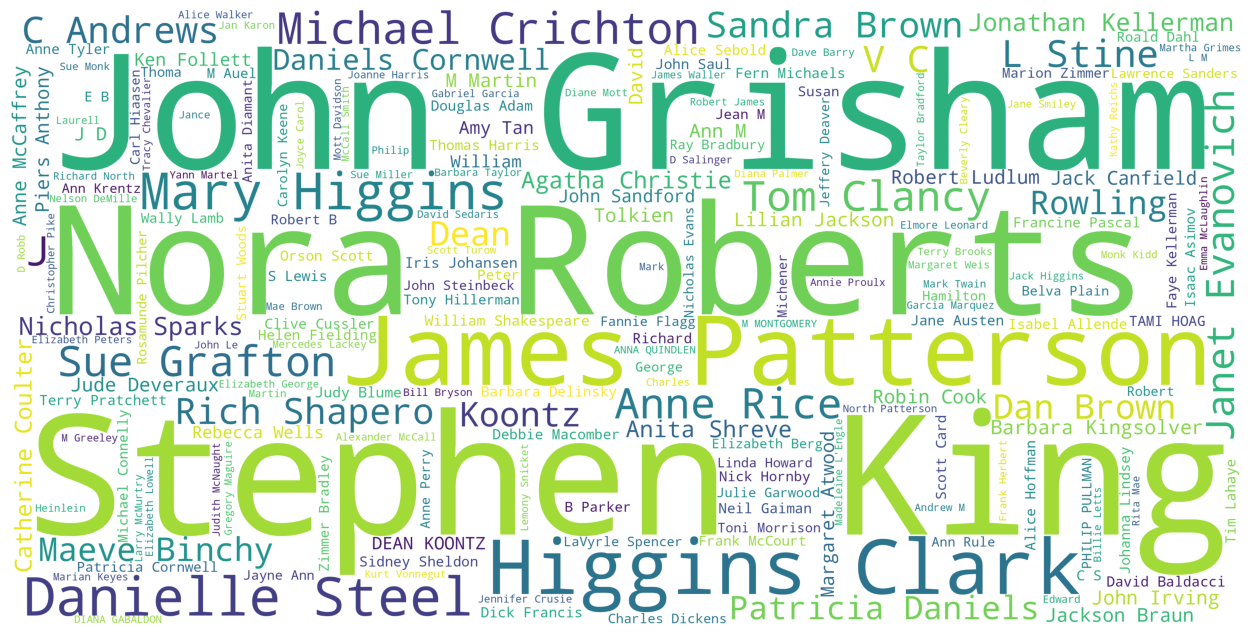

In [109]:
Author_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(Author_corpus)
plt.figure(figsize=(16,8))
plt.imshow(Author_wordcloud)
plt.axis('off')
plt.show()

공포, 초자연 등의 호러소설 작가인 Stephen King, 로맨스 소설 작가인 Nora Roberts 등 장르로 나눌 수 있는 저명한 작가들의 이름이 자주 등장하는 것을 확인할 수 있다.

In [110]:
train[['User-ID','Location']].drop_duplicates().groupby(['User-ID'])['Location'].count().sort_values()

User-ID
USER_00000    1
USER_61443    1
USER_61442    1
USER_61441    1
USER_61440    1
             ..
USER_30605    1
USER_30604    1
USER_30603    1
USER_30622    1
USER_92100    1
Name: Location, Length: 83256, dtype: int64

User-ID를 기준으로 Location은 고유의 값이라는 것을 확인 할 수 있습니다. 즉, 평가를 해주는 유저의 지역은 고유의 값입니다.

In [111]:
train['City'] = [(i.split(',')[0]).lstrip().upper() for i in train['Location']]
train['State'] = [(i.split(',')[1]).lstrip().upper() for i in train['Location']]
train['Country'] = [(i.split(',')[-1]).lstrip().upper() for i in train['Location']]

In [112]:
test['City'] = [(i.split(',')[0]).lstrip().upper() for i in test['Location']]
test['State'] = [(i.split(',')[1]).lstrip().upper() for i in test['Location']]
test['Country'] = [(i.split(',')[-1]).lstrip().upper() for i in test['Location']]

In [113]:
set(train['City'].to_list())

{'',
 'BUCKLEY',
 'HORNSBY',
 'OLLON',
 'PAIA',
 'MAIMI LAKES',
 'EAST COAST',
 'NEWTON',
 'ACME',
 'SADDLE BROOK',
 'DRACHTEN',
 'COLONIAL HEIGHTS',
 'WINOOSKI',
 'FAIRBURN',
 'BROCKLEY',
 'SPRINGBORO',
 'RUSAGONIS',
 'PORT AUGUSTA',
 'PORTUGUESE COVE',
 'FORSTER',
 'PANAMA CTY BCH',
 'ENNISMORE',
 'ALAJUELA',
 'HADDON TWP',
 'ROCHFORD',
 'COUËRON',
 'ADRIAN',
 'ALEXANDER CITY',
 'YVERDON',
 'QUAD CITIES',
 'BRIER',
 'IZUMISANO',
 'NEWTON ABBOT DEVON',
 'ARAB',
 'BERNBURG',
 'HONEOYE',
 'STEINBACH',
 'MARRERO',
 'CARDIFF',
 'KENNEBUNKPORT',
 'LEWISBERRY',
 'HA NOI',
 'MIKKELI',
 'HAMPTON COVE',
 'COURTENAY',
 'CHIBA CITY',
 'SAN DIMAS',
 'BETCHWORTH',
 'EAGLE POINT',
 'LAHORE',
 'CERRETO GUIDI',
 'BOWDOIN',
 'OWHANGO',
 'WALDHEIM',
 'GOSFORD',
 'KNIFE RIVER',
 'WEST JORDAN',
 'MISATO',
 'ROHNERT PARK',
 'FLEKKEFJORD',
 'GALATI',
 '8125-915 VILAMOURA',
 'NEKOOSA',
 'GELNHAUSEN',
 'MAURERTOWN',
 'CEDAR PARK',
 'SCOTTS VALLEY',
 'ANGRA DO HEROÍSMO',
 'PITTSBURGH PA',
 'POMPANO BEACH',
 '

In [114]:
set(train['State'].to_list())

{'',
 'MECKLENBURG/VORPOMMERN',
 'LUBELSKIE',
 'KILDARE',
 'HANTS',
 'EMMENTAL',
 'BA',
 'TUSCANY',
 'REPUBLIC OF PANAMA',
 'GTR MANCHESTER',
 'POHJOIS-SAVO',
 'KADIOGO',
 'OTTAWA',
 'ABERDEENSHIRE',
 'KANTO',
 'CHAMPAGNE',
 'NORTH WEST PROVINCE',
 'GRAN CANARIA',
 'ALAJUELA',
 'UPPLAND',
 'ST. THOMAS',
 'BRABANT',
 'PRENZLAUER BERG',
 'NY',
 'ANGUS',
 'PA',
 'AG/BS',
 'NB',
 'SOUTH GLOS.',
 'CO.WICKLOW',
 'CATALONIAN',
 'BRITISH COLUMBIA',
 'TAYSIDE',
 'IL VENETO',
 'ISLAS BALEARES',
 'NOORD-HOLAND',
 'WOJ. MAZOWIECKIE',
 'BAYERN / BAVARIA',
 'OBERÖSTERREICH',
 'PEEBLESSHIRE',
 'EASTJUTLAND',
 'SHIGA',
 'GALATI',
 'KANTON ZURICH',
 'WEST VIRGINIA',
 'CUNDINAMARCA',
 'LA RIOJA',
 'NORTHLAND',
 'KINGS-HEATH ?',
 'WESTERN PENNSYLVANIA',
 'ZÜRCHER UNTERLAND',
 'SJÆLLAND',
 'IGLOO CITY',
 'SUNDERLAND',
 'ATHENS',
 'ISLAS CANARIAS',
 'ZURICH',
 'SOUTH YORKSHIRE',
 'MIDLANDS',
 'REGGIO EMILIA',
 'NORTH WEST ENGLAND',
 'GLASGOW',
 'AUST-AGDER',
 'MARAMURES',
 'CHAMPAGNE-ARDENNES',
 'TEXAS',
 

In [115]:
train['Country'].unique()

array(['CANADA', 'USA', 'GERMANY', 'SPAIN', 'AUSTRALIA', 'UNITED KINGDOM',
       '', 'ITALY', 'NETHERLANDS', 'PORTUGAL', 'SWEDEN', 'AUSTRIA',
       'FRANCE', 'FINLAND', 'NEW ZEALAND', 'SINGAPORE', 'SWITZERLAND',
       'PHILIPPINES', 'ESPAÑA', 'MALAYSIA', 'BELGIUM', 'JAPAN', 'DENMARK',
       'BELIZE', 'ENGLAND', 'POLAND', 'IRELAND', 'HAITI',
       'TRINIDAD AND TOBAGO', 'DEUTSCHLAND', 'TANZANIA', 'MOLDOVA',
       'BULGARIA', 'LUXEMBOURG', 'SOUTH AFRICA', 'CZECH REPUBLIC',
       'ISRAEL', 'MALTA', 'PETROLWAR NATION', 'KUWAIT', 'PERU', 'ECUADOR',
       'SOUTH KOREA', 'TURKEY', 'NIGERIA', 'BRAZIL', 'HUNGARY',
       'INDONESIA', 'KAZAKHSTAN', 'INDIA', 'CHINA', 'EGYPT', 'CROATIA',
       'TAIWAN', 'ARGENTINA', 'CHILE', 'VENEZUELA', 'GALIZA', 'ICELAND',
       'SCOTLAND', 'BOLIVIA', 'LITHUANIA', 'NORWAY', 'MEXICO', 'BAHAMAS',
       'UNITED SATES', 'ROMANIA', 'IRAN', 'DOMINICAN REPUBLIC',
       'MARICOPA', 'THE WORLD TOMORROW', 'ANDORRA', 'GALIZA NEGHRA',
       'JERSEY', 'GHANA', '

Location을 ','로 나누면 첫 단어가 도시, 두번째가 State(주), 마지막 단어가 나라입니다. 해당 열을 새로 만들어줍니다.

In [116]:
con_df = pd.DataFrame(train['Country'].value_counts())
con_df = con_df.reset_index()
con_df.columns = ['Country','num_country']
con_df

,Country,num_country
0,USA,630043
1,CANADA,78571
2,UNITED KINGDOM,27050
3,GERMANY,23471
4,,21012
...,...,...
239,PALAU,1
240,GALIZA NEGHRA,1
241,MACEDONIA,1
242,PRINCE WILLIAM,1


In [117]:
train[train['Country'] == 'RICHMOND COUNTRY']

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
58728,TRAIN_058728,USER_06105,BOOK_028694,7,35.0,"staten island, new york, richmond country",The Pigman,PAUL ZINDEL,1983.0,Bantam,STATEN ISLAND,NEW YORK,RICHMOND COUNTRY


지역이 Null이거나 N/A 처럼 표기된 곳도 있고, PRINCE WILLIAM, RICHMOND COUNTRY과 같이 이상한 지역도 있습니다. 엄밀하게는 나라말고 이상한 것들이 끼어있습니다. 해당 자료는 전처리가 필요합니다. City, State를 가지고 최빈값(mode)를 이용하여 Country를 채우는 것도 하나의 방법이라고 생각합니다.

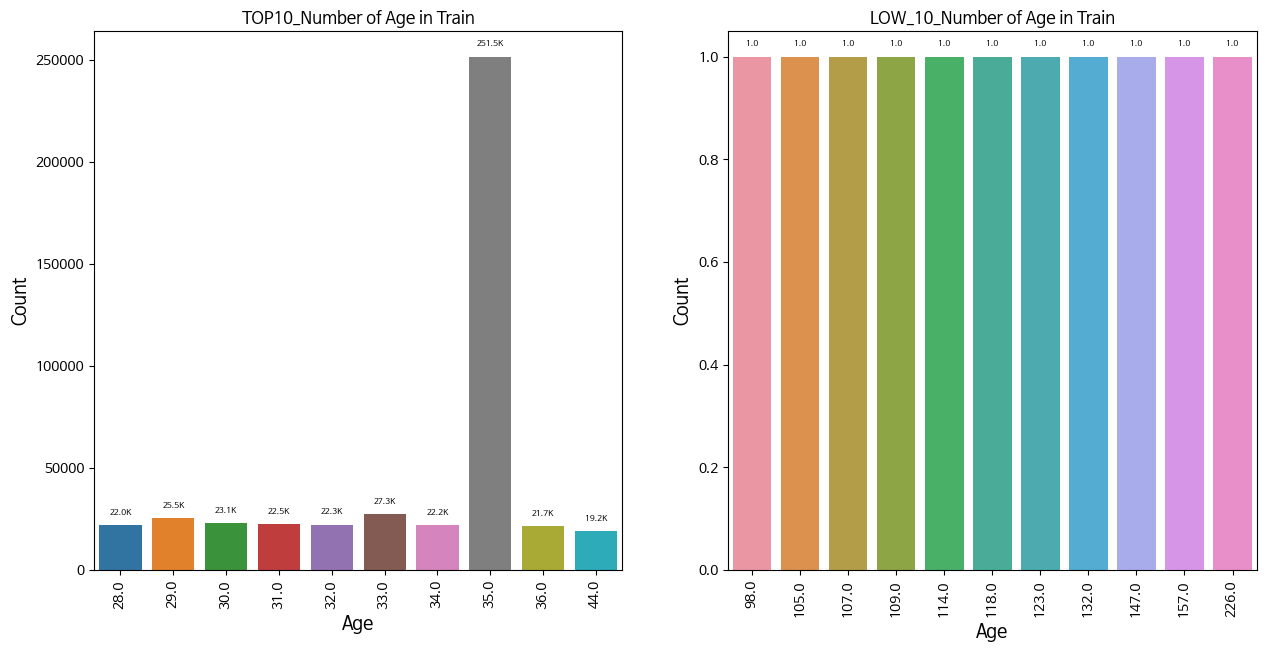

In [118]:
def km_gb(value):
    if value < 1e6:
        return format((value/1e3), '.01f')+"K"
    else:
        return format((value/1e6), '.01f')+"M"

import seaborn as sns

train_age = train.groupby("Age").size()

train_age = train_age.reset_index()
train_age.columns = ["Age", "count"]
train_age = train_age.sort_values(by = "count", ascending = False)
train_age['rank'] = train_age['count'].rank(ascending=False) 
train_age = train_age[train_age['rank']<= 10]

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
splot=sns.barplot(x="Age",y="count",data = train_age)
for p in splot.patches:
    splot.annotate(km_gb(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Age", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('TOP10_Number of Age in Train')


train_bot = train.groupby("Age").size()

train_bot = train_bot.reset_index()
train_bot.columns = ["Age", "count"]
train_bot = train_bot.sort_values(by = "count", ascending = False)
train_bot['rank'] = train_bot['count'].rank(ascending=True) 
train_bot = train_bot[train_bot['rank']<= 10]

plt.subplot(1, 2, 2)
splot=sns.barplot(x="Age",y="count",data = train_bot)
for p in splot.patches:
    splot.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=6,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Age", size =13)
plt.xticks(rotation = 90)
plt.ylabel("Count",size =13)
plt.title('LOW_10_Number of Age in Train')

plt.show()


나이대가 0살부터 244살까지 다양하게 있다. 분명 0살이나 110살 이상의 데이터는 오기입인 데이터일 확률이 높다. 이상치 처리를 하기전에 해당 데이터를 그룹화하여 확인한다.

In [119]:
# 나이 그룹화
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 250]
train['Age_gb'] = pd.cut(train.Age, bins, labels = labels,include_lowest = True)

In [120]:
test['Age_gb'] = pd.cut(test.Age, bins, labels = labels,include_lowest = True)

Text(0, 0.5, 'count')

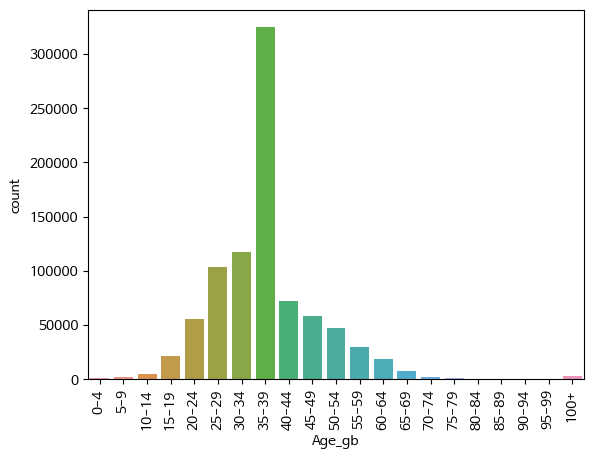

In [121]:
import matplotlib.pyplot as plt

train_hist = train.groupby(["Age_gb"]).size()

train_hist = train_hist.reset_index()
train_hist.columns = ["Age_gb", "count"]
sns.barplot(x = 'Age_gb', y= 'count', data = train_hist)
plt.xlabel("Age_gb")
plt.xticks(rotation = 90)
plt.ylabel("count")

앞선 데이터와 비슷하게 20대 중후반부터 40대 초중반에 독서 리뷰를 작성한 사람들이 몰려있다.

# 2023.04.18

In [168]:
rating_count =train.groupby(['Book-Title','Book-Rating'])['Book-Rating'].count().max(level=0)

<ipython-input-168-0cc0ebcd4aaa>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  rating_count =train.groupby(['Book-Title','Book-Rating'])['Book-Rating'].count().max(level=0)


In [169]:
rating_count = pd.DataFrame(rating_count) 

In [173]:
rating_count = rating_count.reset_index()
rating_count.columns = ['Book-Title', 'Rating_counts']
rating_count

,Book-Title,Rating_counts
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
217824,Ã?Â?lpiraten.,2
217825,Ã?Â?rger mit Produkt X. Roman.,1
217826,Ã?Â?sterlich leben.,1
217827,Ã?Â?stlich der Berge.,2


In [174]:
train = pd.merge(train, rating_count, on = 'Book-Title', how = 'outer')
train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Age_gb,ratings_count,Rating_counts
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,SACKVILLE,NEW BRUNSWICK,CANADA,20-24,NaN,9
1,TRAIN_172879,USER_18605,BOOK_044368,0,44.0,"ft huachuca, arizona, usa",Road Taken,Rona Jaffe,2001.0,Mira,FT HUACHUCA,ARIZONA,USA,40-44,NaN,9
2,TRAIN_176634,USER_19119,BOOK_044368,0,38.0,"glen ellyn, illinois, usa",Road Taken,Rona Jaffe,2001.0,Mira,GLEN ELLYN,ILLINOIS,USA,35-39,NaN,9
3,TRAIN_213643,USER_23578,BOOK_044368,0,49.0,"chantilly, virginia, usa",Road Taken,Rona Jaffe,2001.0,Mira,CHANTILLY,VIRGINIA,USA,45-49,NaN,9
4,TRAIN_329292,USER_35257,BOOK_044368,6,43.0,"northglenn, colorado, usa",Road Taken,Rona Jaffe,2001.0,Mira,NORTHGLENN,COLORADO,USA,40-44,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871372,USER_92093,BOOK_262066,0,37.0,"lakewood, colorado, usa",Be Victorious (Be),Warren W. Wiersbe,1985.0,Victor Books,LAKEWOOD,COLORADO,USA,35-39,NaN,1
871389,TRAIN_871376,USER_92093,BOOK_264287,0,37.0,"lakewood, colorado, usa",Prodigals and Those Who Love Them: Study Guide,Stephen Griffith,1991.0,Thomas Nelson Inc,LAKEWOOD,COLORADO,USA,35-39,NaN,1
871390,TRAIN_871377,USER_92093,BOOK_264484,0,37.0,"lakewood, colorado, usa",A Transatlantic Love Affair: Letters to Nelson...,Simone De Beauvoir,1999.0,New Press,LAKEWOOD,COLORADO,USA,35-39,NaN,1
871391,TRAIN_871378,USER_92093,BOOK_265220,0,37.0,"lakewood, colorado, usa",He's My Brother: Former Racial Foes Offer Stra...,John Perkins,1994.0,Baker Pub Group,LAKEWOOD,COLORADO,USA,35-39,NaN,1


<Axes: xlabel='Rating_counts', ylabel='Book-Title'>

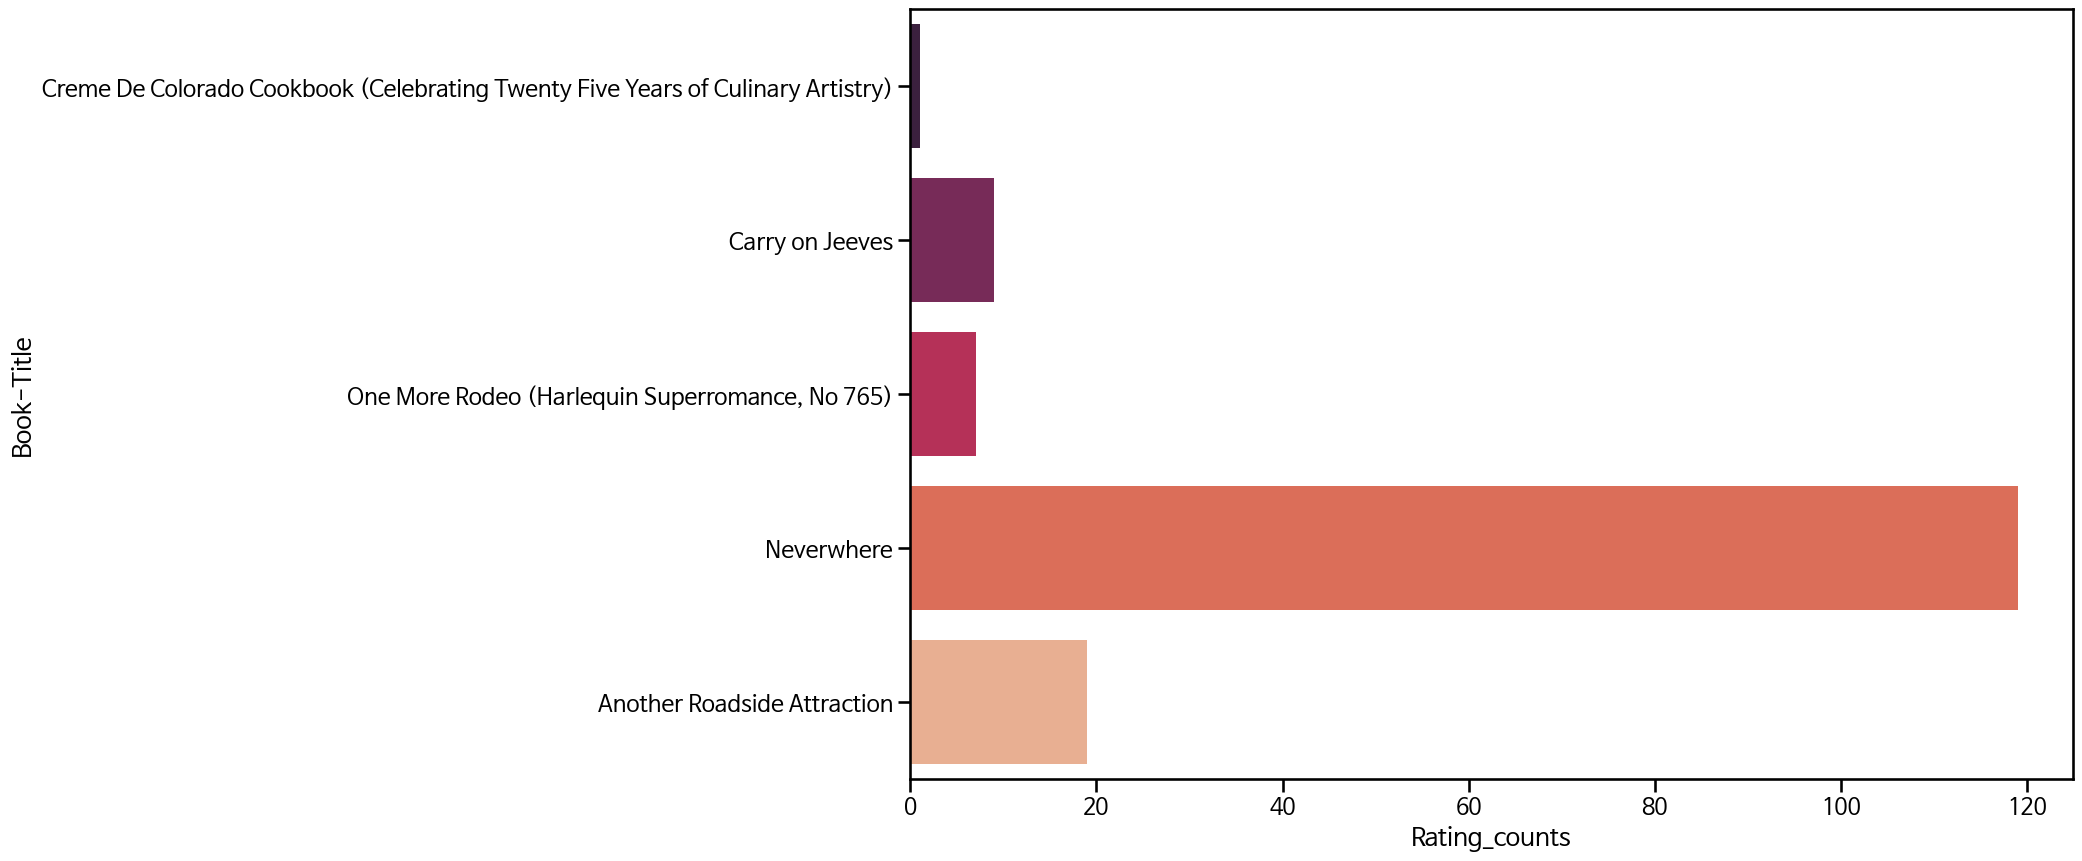

In [177]:
# 가장 점수가 높은 책
most_rated = train.sort_values('Book-Rating', ascending = False).head(10).set_index('Book-Title')
plt.figure(figsize=(15,10))
sns.barplot(x = most_rated['Rating_counts'], y = most_rated.index, palette='rocket')

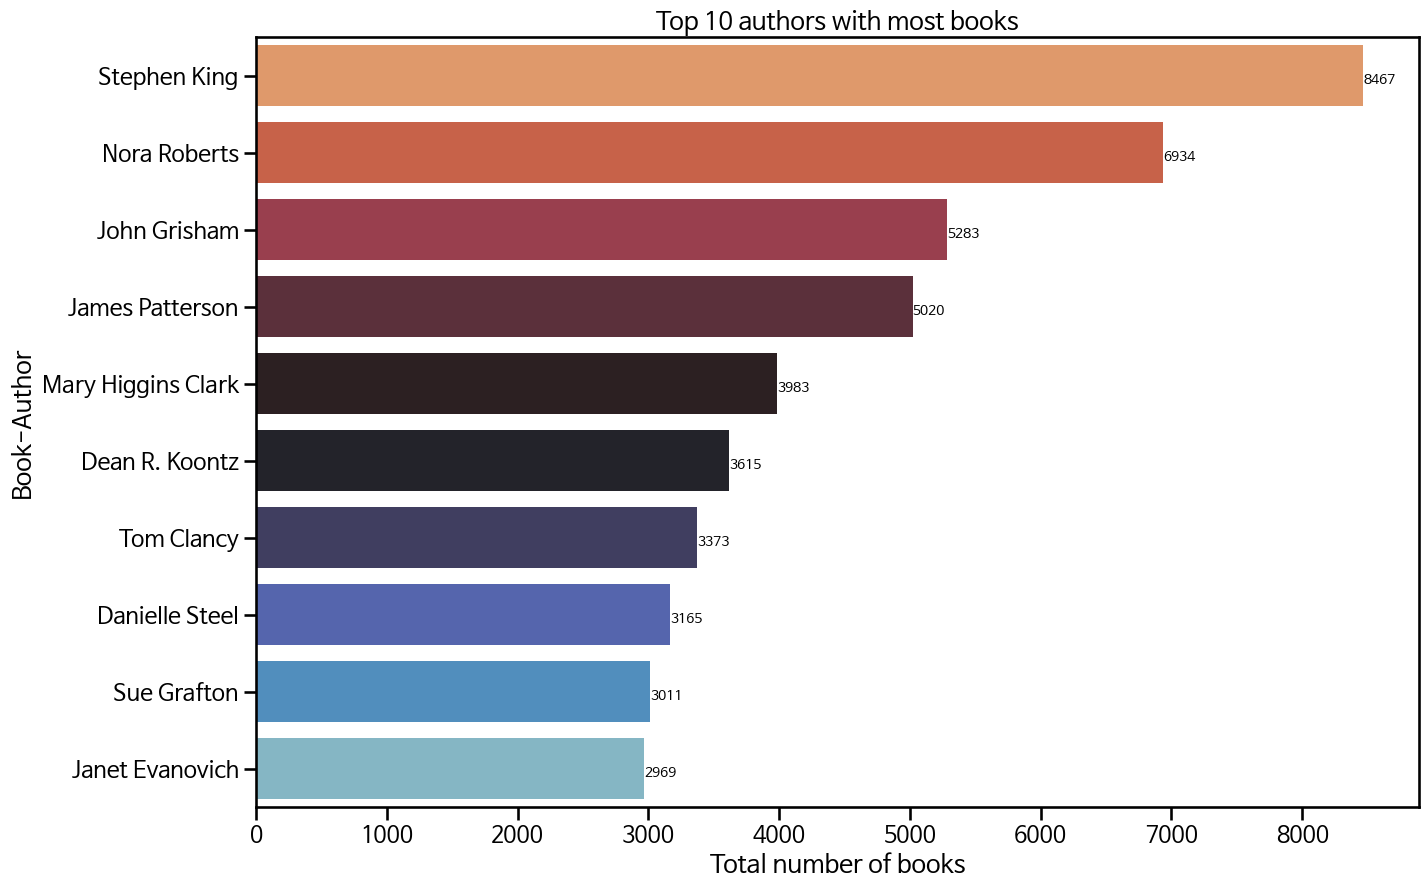

In [128]:
# 가장 많이 나온 저자
sns.set_context('talk')
most_books = train.groupby('Book-Author')['Book-Title'].count().reset_index().sort_values('Book-Title', ascending=False).head(10).set_index('Book-Author')
plt.figure(figsize=(15,10))
ax = sns.barplot(x = most_books['Book-Title'],y=  most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')


In [134]:
from sklearn.preprocessing import LabelEncoder
qual_col = ['User-ID', 'Book-ID','Book-Title','Book-Author','Publisher','City','State','Country','Age_gb', 'Location']

train_lb = train.__deepcopy__() 
test_lb = test.__deepcopy__()

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(train_lb[i])
    for label in np.unique(test[i].dropna()):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    train_lb[i] = le.transform(train_lb[i])
    test_lb[i] = le.transform(test_lb[i])

In [140]:
X_train = train_lb.drop(columns = ['ID','Book-Rating'])
y_train = train_lb['Book-Rating']
x_test = test_lb.drop(columns = ['ID'])

In [136]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, random_state=113, shuffle=True)
from catboost import CatBoostRegressor

model = CatBoostRegressor(
                      random_state=113,
                      loss_function='RMSE')

In [141]:
y_valid_pred = 0*y_train
y_test_pred = 0

for i, (train_index, test_index) in enumerate(kf.split(X_train)):    
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    print( "\nFold ", i)
    
    fit_model = model.fit(X_train_fold, y_train_fold, 
                          eval_set=(X_valid_fold, y_valid_fold),
                          use_best_model=True
                          )
    print( "  N trees = ", model.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid_fold)
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(x_test)
    
y_test_pred /= 5  # Average test set predictions


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
37:	learn: 3.7456638	test: 3.7471426	best: 3.7471426 (37)	total: 3.79s	remaining: 1m 35s
38:	learn: 3.7450993	test: 3.7466425	best: 3.7466425 (38)	total: 3.9s	remaining: 1m 36s
39:	learn: 3.7440573	test: 3.7455811	best: 3.7455811 (39)	total: 4.07s	remaining: 1m 37s
40:	learn: 3.7433917	test: 3.7449258	best: 3.7449258 (40)	total: 4.28s	remaining: 1m 40s
41:	learn: 3.7419036	test: 3.7434140	best: 3.7434140 (41)	total: 4.48s	remaining: 1m 42s
42:	learn: 3.7408522	test: 3.7423936	best: 3.7423936 (42)	total: 4.7s	remaining: 1m 44s
43:	learn: 3.7388089	test: 3.7403724	best: 3.7403724 (43)	total: 4.94s	remaining: 1m 47s
44:	learn: 3.7377405	test: 3.7393708	best: 3.7393708 (44)	total: 5.11s	remaining: 1m 48s
45:	learn: 3.7373508	test: 3.7390353	best: 3.7390353 (45)	total: 5.29s	remaining: 1m 49s
46:	learn: 3.7364445	test: 3.7381926	best: 3.7381926 (46)	total: 5.49s	remaining: 1m 51s
47:	learn: 3.7356456	test: 3.7373177	best: 3.7373177 (47)	total: 5.7s	remain

In [142]:
sub = pd.DataFrame()
sub['ID'] = test['ID']
sub['Book-Rating'] = y_test_pred
sub

,ID,Book-Rating
0,TEST_000000,4.157997
1,TEST_000001,3.988637
2,TEST_000002,4.020637
3,TEST_000003,4.353862
4,TEST_000004,4.443021
...,...,...
159616,TEST_159616,4.458948
159617,TEST_159617,3.732861
159618,TEST_159618,4.299023
159619,TEST_159619,3.586675


In [143]:
sub.to_csv(os.path.join(file_dir,'submit_cat.csv'), index=False,encoding="utf-8-sig")